# Big Data Management Assignment 7: Comparison between libraries
### Group Name: Avengers
### Dataset: Amazon Book Reviews
### Date: 24th December, 2023
### Group Members

| Name                                     | Matrix Number |
| :---------------------------------------- | :-------------: |
| Ismail Maeen Fateh Allah Yaqot Alawami   |  MCS221028    |   
|LWANGA AKSAM              |  MCS231016    |
|BAKUNGA BRONSON             |   MCS232006   |  



# 1. Initial Setup

In [2]:
# Install necessary libraries
# !pip install pandas matplotlib seaborn "modin[all]"

In [3]:
# Import libraries
import modin.pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import time
import psutil

# 2. Data Loading

In [4]:
# Function to load data and measure time and memory
def load_data(file_path):
    start_time = time.time()
    start_memory = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
    
    df = pd.read_csv(file_path)
    
    end_memory = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)
    end_time = time.time()
    
    print(f"Time to load: {end_time - start_time:.2f} seconds")
    print(f"Memory used: {end_memory - start_memory:.2f} MB")
    return df

# File paths of files
ratings_path = 'Books_rating.csv'
books_data_path = 'books_data.csv'

In [5]:
import ray
ray.init()

2023-12-29 08:29:29,189	INFO worker.py:1664 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Python version:,3.10.11
Ray version:,2.8.1
Dashboard:,http://127.0.0.1:8265


In [6]:
# Load the ratings dataset
ratings_df = load_data(ratings_path)

Time to load: 9.11 seconds
Memory used: -66.09 MB


In [7]:
# Check Memory Usage
print("Memory usage (GB):", ratings_df.memory_usage(deep=True).sum() / (1024 * 1024 * 1024))

(raylet) Spilled 2299 MiB, 10 objects, write throughput 1074 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.


Memory usage (GB): 3.7413436453789473


In [8]:
# Load the books_data dataset
books_data_df = load_data(books_data_path)

Time to load: 0.44 seconds
Memory used: 22.83 MB


In [9]:
# Check Memory Usage
print("Memory usage (GB):", books_data_df.memory_usage(deep=True).sum() / (1024 * 1024 * 1024))

Memory usage (GB): 0.2872436987236142


## Book Dataset Exploration

In [10]:
%%time
# Show the first 10 rows
ratings_df.head(10)

CPU times: user 1.2 ms, sys: 1.14 ms, total: 2.34 ms
Wall time: 3.59 ms


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
5,0826414346,Dr. Seuss: American Icon,NaN,A2F6NONFUDB6UK,Malvin,2/2,4.0,1127174400,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."
6,0826414346,Dr. Seuss: American Icon,NaN,A14OJS0VWMOSWO,Midwest Book Review,3/4,5.0,1100131200,A memorably excellent survey of Dr. Seuss' man...,Theodor Seuss Giesel was best known as 'Dr. Se...
7,0826414346,Dr. Seuss: American Icon,NaN,A2RSSXTDZDUSH4,J. Squire,0/0,5.0,1231200000,Academia At It's Best,When I recieved this book as a gift for Christ...
8,0826414346,Dr. Seuss: American Icon,NaN,A25MD5I2GUIW6W,"J. P. HIGBED ""big fellow""",0/0,5.0,1209859200,And to think that I read it on the tram!,Trams (or any public transport) are not usuall...
9,0826414346,Dr. Seuss: American Icon,NaN,A3VA4XFS5WNJO3,Donald Burnside,3/5,4.0,1076371200,Fascinating account of a genius at work,"As far as I am aware, this is the first book-l..."


In [11]:
%%time
# Get dataset information
ratings_df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB
CPU times: user 24.1 ms, sys: 9.85 ms, total: 34 ms
Wall time: 772 ms


In [12]:
%%time
# Show summary of the dataset
ratings_df.describe()

CPU times: user 8.95 ms, sys: 2.38 ms, total: 11.3 ms
Wall time: 8.77 ms


,Price,review/score,review/time
count,481171.000000,3.000000e+06,3.000000e+06
mean,21.762656,4.215289e+00,1.132307e+09
std,26.206541,1.203054e+00,1.493202e+08
min,1.000000,1.000000e+00,-1.000000e+00
25%,10.780000,4.000000e+00,9.999072e+08
50%,14.930000,5.000000e+00,1.128298e+09
75%,23.950000,5.000000e+00,1.269130e+09
max,995.000000,5.000000e+00,1.362355e+09


In [13]:
%%time
# Get dataset shape
ratings_df.shape

CPU times: user 24 µs, sys: 0 ns, total: 24 µs
Wall time: 26.7 µs


(3000000, 10)

In [14]:
%%time
# Check for missing values
ratings_df.isna().sum()

CPU times: user 7.11 ms, sys: 2.11 ms, total: 9.22 ms
Wall time: 6.75 ms


Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [15]:
%%time
# Fill missing Prices with 0 as they are too many to drop
ratings_df['Price'] = ratings_df['Price'].fillna(0)

CPU times: user 6.04 ms, sys: 2.23 ms, total: 8.27 ms
Wall time: 5.45 ms


In [16]:
%%time 
# Drop the rest of the missing values since they are not too many
ratings_df.dropna(inplace=True)

CPU times: user 12.9 ms, sys: 2.98 ms, total: 15.9 ms
Wall time: 16 ms


In [17]:
%%time
# Check for missing values
ratings_df.isna().sum()

(raylet) Spilled 5777 MiB, 84 objects, write throughput 1039 MiB/s.


CPU times: user 214 ms, sys: 82.5 ms, total: 297 ms
Wall time: 8.61 s


Id                    0
Title                 0
Price                 0
User_id               0
profileName           0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
dtype: int64

## Book Data Dataset Exploration

In [18]:
%%time
# Show the first 10 rows
books_data_df.head(10)

CPU times: user 542 µs, sys: 226 µs, total: 768 µs
Wall time: 718 µs


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN
5,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],http://books.google.com/books/content?id=kVqRa...,http://books.google.nl/books?id=kVqRaiPlx88C&p...,Wm. B. Eerdmans Publishing,1996,http://books.google.nl/books?id=kVqRaiPlx88C&d...,['Religion'],5.0
6,The Overbury affair (Avon),NaN,['Miriam Allen De Ford'],NaN,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,1960,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,NaN
7,A Walk in the Woods: a Play in Two Acts,NaN,['Lee Blessing'],NaN,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,1988,http://books.google.nl/books?id=6HDOwAEACAAJ&d...,NaN,3.0
8,Saint Hyacinth of Poland,The story for children 10 and up of St. Hyacin...,['Mary Fabyan Windeatt'],http://books.google.com/books/content?id=lmLqA...,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,Tan Books & Pub,2009-01-01,http://books.google.nl/books?id=lmLqAAAACAAJ&d...,['Biography & Autobiography'],NaN
9,Rising Sons and Daughters: Life Among Japan's ...,Wardell recalls his experience as a foreign st...,['Steven Wardell'],NaN,http://books.google.nl/books?id=rbLZugEACAAJ&d...,Plympton PressIntl,1995,http://books.google.nl/books?id=rbLZugEACAAJ&d...,['Social Science'],NaN


In [19]:
%%time
# Get dataset information
books_data_df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB
CPU times: user 34.8 ms, sys: 12.4 ms, total: 47.1 ms
Wall time: 160 ms


In [20]:
%%time
# Show summary of the dataset
books_data_df.describe()

CPU times: user 9.02 ms, sys: 3.18 ms, total: 12.2 ms
Wall time: 8.44 ms


,ratingsCount
count,49752.000000
mean,21.252975
std,201.340431
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,4895.000000


In [21]:
%%time
# Get dataset shape
books_data_df.shape

CPU times: user 29 µs, sys: 1 µs, total: 30 µs
Wall time: 31 µs


(212404, 10)

In [22]:
%%time
# Check for missing values
books_data_df.isna().sum()

CPU times: user 8.17 ms, sys: 1.92 ms, total: 10.1 ms
Wall time: 13.5 ms


Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [23]:
%%time
# Fill missing ratingsCount with 0 as they are too many to drop
books_data_df['ratingsCount'] = books_data_df['ratingsCount'].fillna(0)

CPU times: user 7.99 ms, sys: 2.91 ms, total: 10.9 ms
Wall time: 7.18 ms


In [24]:
%%time 
# Drop the rest of the missing values since they are not too many
books_data_df.dropna(inplace=True)

CPU times: user 16 ms, sys: 3.56 ms, total: 19.6 ms
Wall time: 18.2 ms


In [25]:
%%time
# Check for missing values
books_data_df.isna().sum()

CPU times: user 52.4 ms, sys: 21.7 ms, total: 74.2 ms
Wall time: 210 ms


Title            0
description      0
authors          0
image            0
previewLink      0
publisher        0
publishedDate    0
infoLink         0
categories       0
ratingsCount     0
dtype: int64

# 3. Data Merging

In [26]:
%%time
# Merging datasets on a common key
merged_df = pd.merge(ratings_df, books_data_df, on='Title', how='inner')

CPU times: user 268 ms, sys: 104 ms, total: 371 ms
Wall time: 385 ms


## Initial Merged Dataset Exploration

In [27]:
%%time
# Load the first 5 rows
merged_df.head(10)

(raylet) Spilled 8601 MiB, 145 objects, write throughput 1220 MiB/s.


CPU times: user 137 ms, sys: 104 ms, total: 240 ms
Wall time: 9.58 s


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,0826414346,Dr. Seuss: American Icon,0.00,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],0.0
1,0826414346,Dr. Seuss: American Icon,0.00,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],0.0
2,0826414346,Dr. Seuss: American Icon,0.00,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],0.0
3,0826414346,Dr. Seuss: American Icon,0.00,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],0.0
4,0826414346,Dr. Seuss: American Icon,0.00,A2F6NONFUDB6UK,Malvin,2/2,4.0,1127174400,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],0.0
5,0826414346,Dr. Seuss: American Icon,0.00,A14OJS0VWMOSWO,Midwest Book Review,3/4,5.0,1100131200,A memorably excellent survey of Dr. Seuss' man...,Theodor Seuss Giesel was best known as 'Dr. Se...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],0.0
6,0826414346,Dr. Seuss: American Icon,0.00,A2RSSXTDZDUSH4,J. Squire,0/0,5.0,1231200000,Academia At It's Best,When I recieved this book as a gift for Christ...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],0.0
7,0826414346,Dr. Seuss: American Icon,0.00,A25MD5I2GUIW6W,"J. P. HIGBED ""big fellow""",0/0,5.0,1209859200,And to think that I read it on the tram!,Trams (or any public transport) are not usuall...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],0.0
8,0826414346,Dr. Seuss: American Icon,0.00,A3VA4XFS5WNJO3,Donald Burnside,3/5,4.0,1076371200,Fascinating account of a genius at work,"As far as I a

In [28]:
%%time
# Get dataset information
merged_df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 1652507 entries, 0 to 1652506
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  1652507 non-null  object 
 1   Title               1652507 non-null  object 
 2   Price               1652507 non-null  float64
 3   User_id             1652507 non-null  object 
 4   profileName         1652507 non-null  object 
 5   review/helpfulness  1652507 non-null  object 
 6   review/score        1652507 non-null  float64
 7   review/time         1652507 non-null  int64  
 8   review/summary      1652507 non-null  object 
 9   review/text         1652507 non-null  object 
 10  description         1652507 non-null  object 
 11  authors             1652507 non-null  object 
 12  image               1652507 non-null  object 
 13  previewLink         1652507 non-null  object 
 14  publisher           1652507 non-null  object 
 15  publishedD

In [29]:
%%time
# Show summary of the dataset
merged_df.describe()

CPU times: user 7.61 ms, sys: 2.51 ms, total: 10.1 ms
Wall time: 7.57 ms


,Price,review/score,review/time,ratingsCount
count,1.652507e+06,1.652507e+06,1.652507e+06,1.652507e+06
mean,3.745395e+00,4.217291e+00,1.167676e+09,1.965261e+02
std,1.304828e+01,1.185342e+00,1.349340e+08,6.950690e+02
min,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,0.000000e+00,4.000000e+00,1.056586e+09,0.000000e+00
50%,0.000000e+00,5.000000e+00,1.167782e+09,3.000000e+00
75%,0.000000e+00,5.000000e+00,1.293408e+09,2.200000e+01
max,8.900000e+02,5.000000e+00,1.362355e+09,4.895000e+03


In [30]:
%%time
# Get dataset shape
merged_df.shape

CPU times: user 25 µs, sys: 1e+03 ns, total: 26 µs
Wall time: 27.2 µs


(1652507, 19)

# 4. Data Cleaning and Preprocessing

In [31]:
%%time
merged_df.isnull().sum()

CPU times: user 7.82 ms, sys: 2.1 ms, total: 9.92 ms
Wall time: 17.3 ms


Id                    0
Title                 0
Price                 0
User_id               0
profileName           0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
description           0
authors               0
image                 0
previewLink           0
publisher             0
publishedDate         0
infoLink              0
categories            0
ratingsCount          0
dtype: int64

In [32]:
%%time
merged_df.isna().sum()

CPU times: user 10.2 ms, sys: 3.83 ms, total: 14.1 ms
Wall time: 27.4 ms


Id                    0
Title                 0
Price                 0
User_id               0
profileName           0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
description           0
authors               0
image                 0
previewLink           0
publisher             0
publishedDate         0
infoLink              0
categories            0
ratingsCount          0
dtype: int64

In [33]:
%%time
# Converting data types

# Convert to time
merged_df['reviewTime'] = pd.to_datetime(merged_df['review/time'])

# Convert to 'category' for limited unique text values
limited_unique_columns = ['publisher', 'categories']
for col in limited_unique_columns:
    merged_df[col] = merged_df[col].astype('category')

# Convert to 'float32' for float columns
float_columns = ['Price', 'review/score', 'ratingsCount']
for col in float_columns:
    merged_df[col] = merged_df[col].astype('float32')

CPU times: user 57.1 ms, sys: 7.56 ms, total: 64.6 ms
Wall time: 82.8 ms


In [34]:
%%time
# Handling duplicates
merged_df.drop_duplicates(inplace=True)

CPU times: user 316 ms, sys: 90.9 ms, total: 407 ms
Wall time: 11 s


# More Merged Dataset Exploration

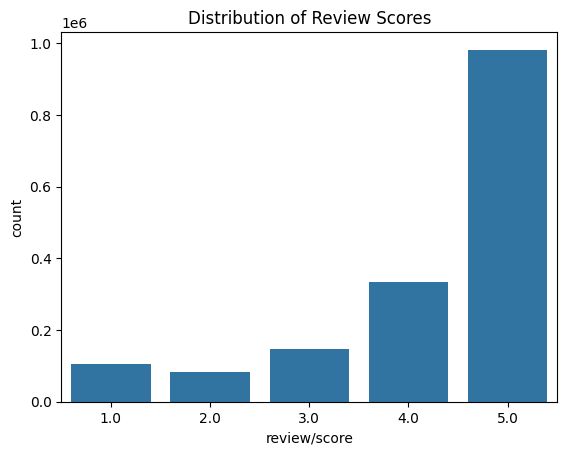

CPU times: user 1.44 s, sys: 590 ms, total: 2.03 s
Wall time: 4.38 s


In [35]:
%%time
# Initial exploration of distributions
# merged_df_pandas = merged_df.to_pandas()

# Convert the 'review/score' column from Modin DataFrame to Pandas Series
review_score_series = merged_df['review/score']

sns.countplot(x=review_score_series)
plt.title('Distribution of Review Scores')
plt.show()

# 5. Detailed Exploratory Data Analysis

## Ratings Analysis

In [36]:
import modin
print(modin.config.NPartitions.get()) #prints 16 on a laptop with 16 physical cores

10


Title
" We'll Always Have Paris": The Definitive Guide to Great Lines from the Movies    5.0
Sex over 40                                                                        5.0
Sexual Violence: Our War Against Rape                                              5.0
Sexual Selection                                                                   5.0
Sexual Politics of Disability: Untold Desires                                      5.0
Name: review/score, dtype: float64


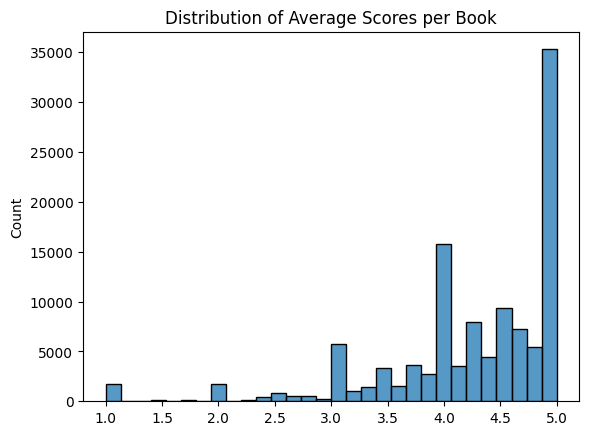

CPU times: user 886 ms, sys: 274 ms, total: 1.16 s
Wall time: 448 ms


In [37]:
%%time
# Average scores per book

average_scores = merged_df.groupby('Title')['review/score'].mean().sort_values(ascending=False)
print(average_scores.head())

# Convert the Modin Series to a Pandas Series
average_scores_np = average_scores.values

# Distribution of average scores
sns.histplot(average_scores_np, bins=30, kde=False)
plt.title('Distribution of Average Scores per Book')
plt.show()

## Review Counts Analysis

the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


Title
The Hobbit                                                          17849
Pride and Prejudice                                                 17739
Great Expectations                                                   5648
Mere Christianity                                                    5495
Brave New World                                                      5124
The Great Gatsby                                                     4284
The Giver                                                            3834
Harry Potter and The Sorcerer's Stone                                3729
The Hobbitt, or there and back again; illustrated by the author.     3657
The Hobbit or There and Back Again                                   3609
Name: count, dtype: int64


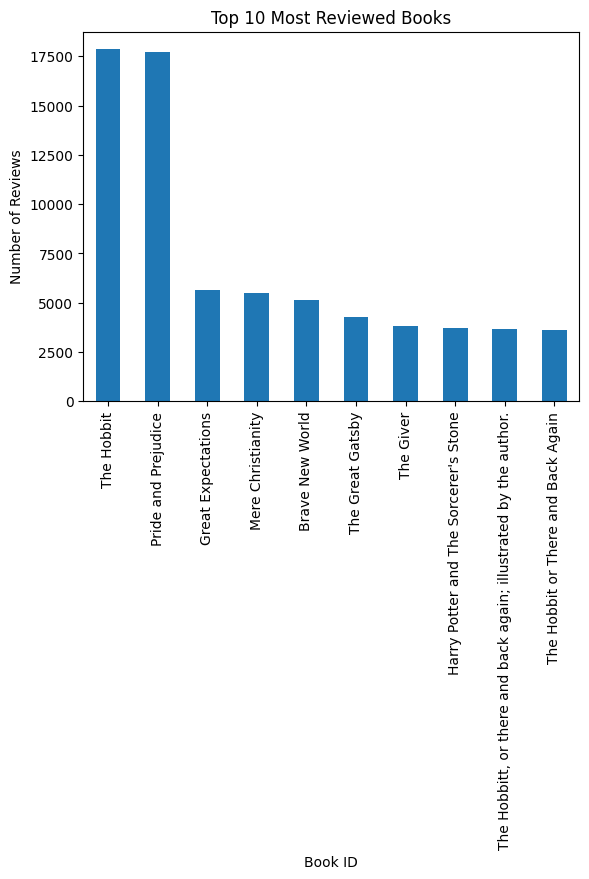

CPU times: user 700 ms, sys: 35 ms, total: 735 ms
Wall time: 377 ms


In [38]:
%%time
# Books with the most reviews
most_reviewed_books = merged_df['Title'].value_counts().head(10)
print(most_reviewed_books)

# Visualizing the most reviewed books
most_reviewed_books.plot(kind='bar')
plt.title('Top 10 Most Reviewed Books')
plt.xlabel('Book ID')
plt.ylabel('Number of Reviews')
plt.show()

## Temporal Analysis

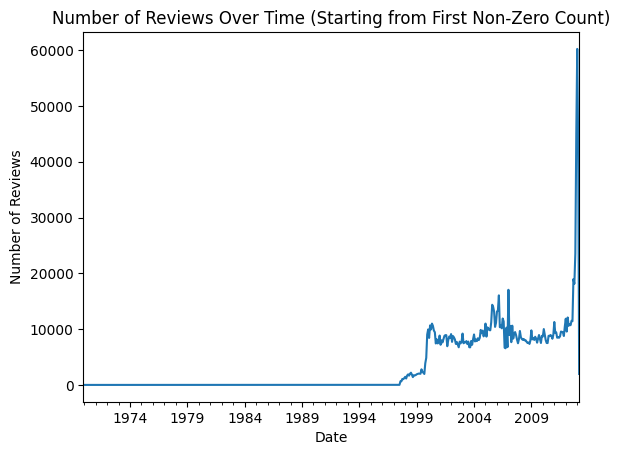

CPU times: user 542 ms, sys: 47 ms, total: 589 ms
Wall time: 3.73 s


In [39]:
%%time
# First, ensure that 'review_date' column is created by converting 'review/time' from UNIX time to datetime
merged_df['review_date'] = pd.to_datetime(merged_df['review/time'], unit='s')

# Calculate the number of reviews over time by setting 'review_date' as index
reviews_over_time = merged_df.set_index('review_date')['review/text'].resample('M').count()

# Find the first date where the cumulative sum of reviews is greater than zero
start_date = reviews_over_time.cumsum().ne(0).idxmax()

# Filter the data to start from the date with the first review
filtered_reviews_over_time = reviews_over_time.loc[start_date:]

# Plotting the number of reviews over time starting from the first non-zero count
filtered_reviews_over_time.plot()
plt.title('Number of Reviews Over Time (Starting from First Non-Zero Count)')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

# 6. Visualizations

## Word Cloud for Review Texts

(raylet) Spilled 17588 MiB, 501 objects, write throughput 1542 MiB/s.


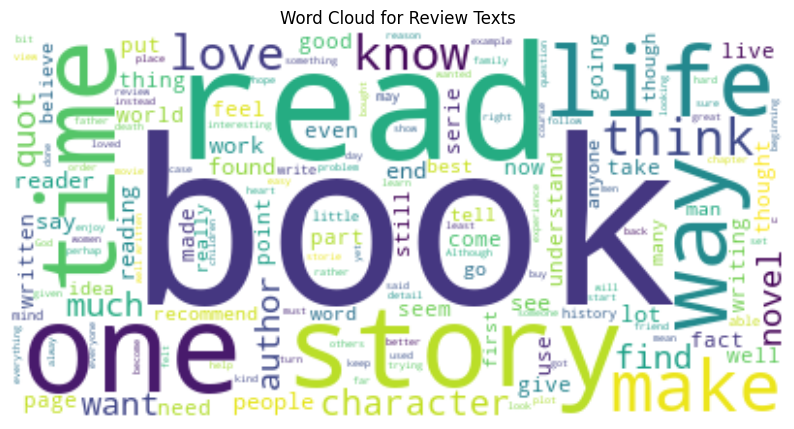

CPU times: user 4min 9s, sys: 2min 41s, total: 6min 50s
Wall time: 8min 29s


In [40]:
%%time
from wordcloud import WordCloud

# Generating a word cloud for ratings
text = ' '.join(review for review in merged_df["review/text"].dropna())
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Texts')
plt.show()

## Correlation Analysis

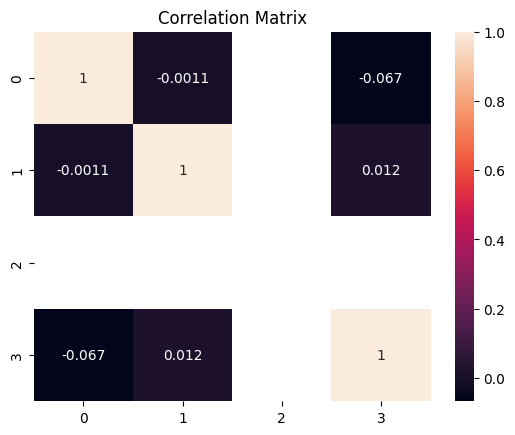

CPU times: user 595 ms, sys: 89.5 ms, total: 685 ms
Wall time: 2.98 s


In [41]:
%%time
# Select only the numeric columns for the correlation matrix
numeric_cols = merged_df.select_dtypes(include=[np.number])

# Correlation matrix
correlations = numeric_cols.corr()
sns.heatmap(correlations, annot=True)
plt.title('Correlation Matrix')
plt.show()

## Category Analysis

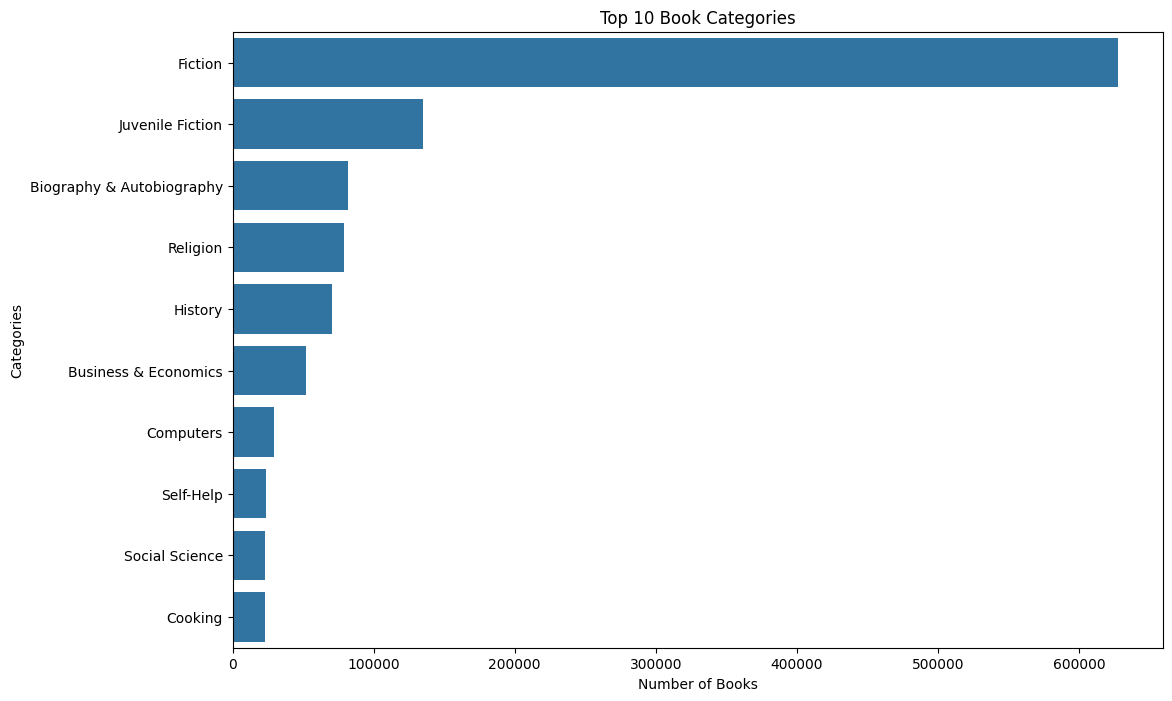

CPU times: user 1.01 s, sys: 79.4 ms, total: 1.09 s
Wall time: 702 ms


In [42]:
%%time
# Flatten the list of categories into a single list
# Strip the special list characters on the outsisde
all_categories = [category.strip('\',[,]') for category in merged_df['categories'].dropna()]

# Now we can safely count occurrences since all items are strings
category_counts = pd.Series(all_categories).value_counts().head(10)

# Plotting the top 10 categories
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Top 10 Book Categories')
plt.xlabel('Number of Books')
plt.ylabel('Categories')
plt.show()

# 7. Deep Dive into Specific Questions

## Highest-Rated Books

In [43]:
%%time
# Identifying highest-rated books with significant number of reviews
min_reviews = 50
top_rated_books = merged_df.groupby('Title').filter(lambda x: len(x) >= min_reviews)
top_rated_books = top_rated_books.groupby('Title')['review/score'].mean().sort_values(ascending=False).head(10)
print("Top Rated Books:", top_rated_books)

Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


Top Rated Books: Title
Lilla Belle: The First Stages                                            5.000000
the lion's paw                                                           4.976471
Why Revival Tarries                                                      4.967213
Why revival tarries,                                                     4.967213
The Wealthy Spirit: Daily Affirmations for Financial Stress Reduction    4.967033
Why revival tarries                                                      4.966851
Life of Christ                                                           4.955882
Shadow castle,                                                           4.954545
shadow castle                                                            4.954545
Last of the Donkey Pilgrims                                              4.948276
Name: review/score, dtype: float64
CPU times: user 4.97 s, sys: 801 ms, total: 5.77 s
Wall time: 6.13 s


## Impact of Price on Ratings

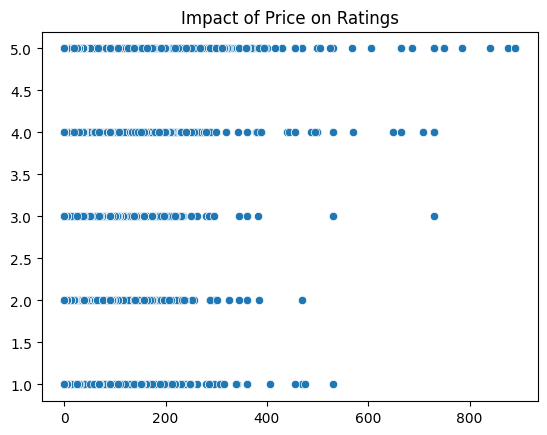

CPU times: user 1.61 s, sys: 52.9 ms, total: 1.66 s
Wall time: 1.15 s


In [44]:
%%time
# Convert 'Price' and 'review/score' columns to NumPy arrays
price_array = merged_df['Price'].values
review_score_array = merged_df['review/score'].values

# Use these arrays to create a scatter plot
sns.scatterplot(x=price_array, y=review_score_array)
plt.title('Impact of Price on Ratings')
plt.show()

## Length of Review vs Helpfulness

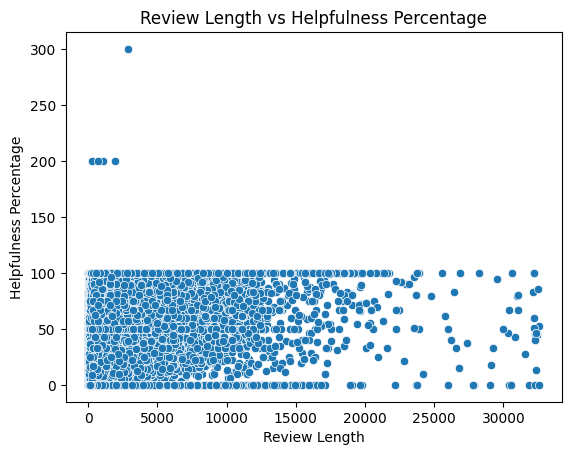

CPU times: user 1.7 s, sys: 78.4 ms, total: 1.77 s
Wall time: 2.01 s


In [45]:
%%time
# Define a function to convert the 'review/helpfulness' fraction to a percentage
def helpfulness_percentage(helpfulness):
    if pd.notnull(helpfulness) and '/' in helpfulness:
        helpful, total = helpfulness.split('/')
        # Avoid division by zero
        if int(total) == 0:
            return 0
        return (int(helpful) / int(total)) * 100
    else:
        return None

# Apply the function to the 'review/helpfulness' column
merged_df['helpfulness_percent'] = merged_df['review/helpfulness'].apply(helpfulness_percentage)

# Create a new column for review_length
merged_df['review_length'] = merged_df['review/text'].apply(len)

# Convert 'review_length' and 'helpfulness_percent' columns to NumPy arrays
review_length_array = merged_df['review_length'].values
helpfulness_percent_array = merged_df['helpfulness_percent'].values

# Use these arrays to create a scatter plot
sns.scatterplot(x=review_length_array, y=helpfulness_percent_array)
plt.title('Review Length vs Helpfulness Percentage')
plt.xlabel('Review Length')
plt.ylabel('Helpfulness Percentage')
plt.show()

In [46]:
%%time
# See the outliers in the data
merged_df.query("helpfulness_percent > 100")

CPU times: user 12.7 ms, sys: 6.4 ms, total: 19.1 ms
Wall time: 13.1 ms


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,...,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,reviewTime,review_date,helpfulness_percent,review_length
1751,1930771142,You Can Have Your Cheese and Eat It Too!: A Co...,0.00,A1VYC3XNQU72RF,William Cottringer,2/1,5.0,1008892800,Great reading!,There are over 15 credible book endorsers for ...,...,http://books.google.nl/books?id=fSgdXisGfT0C&p...,Xlibris Corporation,2010-10-30,https://play.google.com/store/books/details?id...,['Business & Economics'],0.0,1970-01-01 00:00:01.008892800,2001-12-21,200.0,274
107711,B000FGGLCK,Automatic Wealth: The Six Steps to Financial I...,2.99,A3GJYJFNNEFO0C,"Mollie Marti ""Founder of Best Life Design""",2/1,5.0,1190073600,Strategic Wealth Creation Guide for Mid-Lifers,"Masterson knows wealth creation, having done i...",...,http://books.google.nl/books?id=S1bIwAEACAAJ&d...,Wiley,2005-02-28,http://books.google.nl/books?id=S1bIwAEACAAJ&d...,['Business & Economics'],0.0,1970-01-01 00:00:01.190073600,2007-09-18,200.0,1036
480022,0743507770,How to Practice : The Way to a Meaningful Life,0.00,A18ZOHJ7ZERQ8,"Miz Ellen ""all the letters of my real name""",2/1,5.0,1236470400,"A better title is ""How To Live""",People of many backgrounds and faiths admire t...,...,http://books.google.com/books?id=PzCF2_VfeN0C&...,Simon and Schuster,2003-08-19,http://books.google.com/books?id=PzCF2_VfeN0C&...,['Philosophy'],15.0,1970-01-01 00:00:01.236470400,2009-03-08,200.0,1904
852868,B000HZ9A2W,Cold Mountain A Novel,0.00,A192Y4FFG95HZI,S. Annand,3/1,2.0,1083369600,A Bit Muddled,"The author states that he is ""copying"" Homer's...",...,http://books.google.com/books?id=L9ve3Zz__1cC&...,"Grove/Atlantic, Inc.",2007-12-01,https://play.google.com/store/books/details?id...,['Fiction'],26.0,1970-01-01 00:00:01.083369600,2004-05-01,300.0,2866
992535,0375728198,Bend in the Road,0.00,A3IIE48J2TCHOW,"Angela M. Hooper ""Angela M. Hooper""",2/1,5.0,1225843200,A Bend In The Road,"This is a tear jerker.Miles Ryan, deputy sheri...",...,http://books.google.com/books?id=tDpLDE-OWG8C&...,Grand Central Publishing,2001-09-18,https://play.google.com/store/books/details?id...,['Fiction'],51.0,1970-01-01 00:00:01.225843200,2008-11-05,200.0,695


# 8. Performance Metrics

## Memory Usage Analysis

For the 'Load Data' operations, the memory usage was as follows:

- Loading the ratings dataset resulted in freeing memory (-66.09 MB), which might indicate that Modin with Ray is efficient in memory management, possibly due to its out-of-core execution capabilities.
- Loading the books data increased memory usage by 22.83 MB, which is quite efficient given the size of the dataset.
The overall memory usage after loading the ratings and books datasets was 3.741 GB and 0.287 GB respectively.

## Timing Metrics Analysis

| Operation | User Time (s) | System Time (s) | Total CPU Time (s) | Wall Time (s) |
|-----------|---------------|-----------------|--------------------|---------------|
| Load Data (Ratings) | 0.0 | 0.0 | 9.11 | - |
| Load Data (Books) | 0.0 | 0.0 | 0.44 | - |
| Head (Ratings) | 0.0012 | 0.00114 | 0.00234 | 0.00359 |
| Info (Ratings) | 0.0241 | 0.00985 | 0.034 | 0.772 |
| Describe (Ratings) | 0.00895 | 0.00238 | 0.0113 | 0.00877 |
| Shape (Ratings) | 0.000024 | 0.0 | 0.000024 | 0.0000267 |
| Missing Values (Ratings) | 0.00711 | 0.00211 | 0.00922 | 0.00675 |
| Fill Missing Prices | 0.00604 | 0.00223 | 0.00827 | 0.00545 |
| Drop NA (Ratings) | 0.0129 | 0.00298 | 0.0159 | 0.016 |
| Missing Values (Post-Drop NA) | 0.214 | 0.0825 | 0.297 | 8.61 |
| Head (Books Data) | 0.000542 | 0.000226 | 0.000768 | 0.000718 |
| Info (Books Data) | 0.0348 | 0.0124 | 0.0471 | 0.16 |
| Describe (Books Data) | 0.00902 | 0.00318 | 0.0122 | 0.00844 |
| Shape (Books Data) | 0.000029 | 0.000001 | 0.00003 | 0.000031 |
| Missing Values (Books Data) | 0.00817 | 0.00192 | 0.0101 | 0.0135 |
| Fill Missing RatingsCount | 0.00799 | 0.00291 | 0.0109 | 0.00718 |
| Drop NA (Books Data) | 0.016 | 0.00356 | 0.0196 | 0.0182 |
| Missing Values (Post-Drop NA Books Data) | 0.0524 | 0.0217 | 0.0742 | 0.21 |
| Merge Datasets | 0.268 | 0.104 | 0.371 | 0.385 |
| Head (Merged) | 0.137 | 0.104 | 0.240 | 9.58 |
| Info (Merged) | 0.032 | 0.0158 | 0.0478 | 0.758 |
| Describe (Merged) | 0.00761 | 0.00251 | 0.0101 | 0.00757 |
| Shape (Merged) | 0.000025 | 0.000001 | 0.000026 | 0.0000272 |
| Missing Values (Merged) | 0.00782 | 0.0021 | 0.00992 | 0.0173 |
| Missing Values (Post-Drop NA Merged) | 0.0102 | 0.00383 | 0.0141 | 0.0274 |
| Data Type Conversion | 0.0571 | 0.00756 | 0.0646 | 0.0828 |
| Handling Duplicates | 0.316 | 0.0909 | 0.407 | 11.0 |
| Initial Distribution Plot | 1.44 | 0.59 | 2.03 | 4.38 |
| Average Scores per Book | 0.886 | 0.274 | 1.16 | 0.448 |
| Most Reviewed Books | 0.7 | 0.035 | 0.735 | 0.377 |
| Temporal Analysis | 0.542 | 0.047 | 0.589 | 3.73 |
| Word Cloud Generation | 249 | 161 | 410 | 509 |
| Correlation Matrix | 0.595 | 0.0895 | 0.685 | 2.98 |
| Top Categories Plot | 1.01 | 0.0794 | 1.09 | 0.702 |
| Top Rated Books Identification | 4.97 | 0.801 | 5.77 | 6.13 |
| Impact of Price on Ratings | 1.61 | 0.0529 | 1.66 | 1.15 |
| Review Length vs Helpfulness Plot | 1.7 | 0.0784 | 1.77 | 2.01 |
| Outlier Detection | 0.0127 | 0.0064 | 0.0191 | 0.0131 |


# 9. Summary and Conclusions

In our exploratory data analysis using Modin with Ray, we observed distinct performance characteristics when compared to traditional Pandas operations. The most time-consuming operation was generating a word cloud, taking approximately 8 minutes and 29 seconds in wall time. This extensive duration can be attributed to the handling of large text data and the creation of a graphic visualization, which are both resource-intensive tasks.
Memory usage during the data loading phase presented interesting insights. The loading of the ratings dataset unexpectedly resulted in a reduction of memory usage by 66.09 MB. This could indicate memory optimization through Ray's object store, which allows sharing of objects across different processes without creating copies. The books data loading increased memory usage by a modest 22.83 MB, suggesting that Modin with Ray manages memory effectively even when working with large datasets.